## Download horse-or-human data

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip -O ./hhdata/horse-or-human.zip

--2020-07-07 23:25:57--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.177.128, 64.233.185.128, 172.217.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.177.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘./hhdata/horse-or-human.zip’

./hhdata/horse-or-h 100%[===================>] 142.65M  13.4MB/s    in 11s     

2020-07-07 23:26:08 (13.2 MB/s) - ‘./hhdata/horse-or-human.zip’ saved [149574867/149574867]



In [6]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O ./hhdata/validation-horse-or-human.zip

--2020-07-07 23:27:54--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.177.128, 64.233.185.128, 172.217.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.177.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘./hhdata/validation-horse-or-human.zip’

./hhdata/validation 100%[===================>]  10.95M  11.9MB/s    in 0.9s    

2020-07-07 23:27:56 (11.9 MB/s) - ‘./hhdata/validation-horse-or-human.zip’ saved [11480187/11480187]



In [1]:
import os
import zipfile

# extract zip files
local_zip = './hhdata/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./hhdata/horse-or-human')
local_zip = './hhdata/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./hhdata/validation-horse-or-human')
zip_ref.close()

FileNotFoundError: [Errno 2] No such file or directory: './hhdata/horse-or-human.zip'

## Explore Data

In [2]:
# define directories
train_horse_dir = os.path.join('./hhdata/horse-or-human/horses/')
train_human_dir = os.path.join('./hhdata/horse-or-human/humans/')
validation_horse_dir = os.path.join('./hhdata/validation-horse-or-human/horses/')
validation_human_dir = os.path.join('./hhdata/validation-horse-or-human/humans/')

In [3]:
# check few file names in the directories

train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_names = os.listdir(validation_horse_dir)
print(validation_horse_names[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']
['horse1-000.png', 'horse1-105.png', 'horse1-122.png', 'horse1-127.png', 'horse1-170.png', 'horse1-204.png', 'horse1-224.png', 'horse1-241.png', 'horse1-264.png', 'horse1-276.png']
['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-04.png', 'valhuman01-05.png', 'valhuman01-06.png', 'valhuman01-07.png', 'valhuman01-08.png', 'valhuman01-09.png']


In [4]:
# total number of horse and human images
print('total training horse images:', len(train_horse_names))
print('total training human images:', len(train_human_names))
print('total validation horse images:', len(validation_horse_names))
print('total validation human images:', len(validation_human_names))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# output images in 4x4 configuration
nrows = 4
ncols = 4

# index for iterating over images
img_index = 0

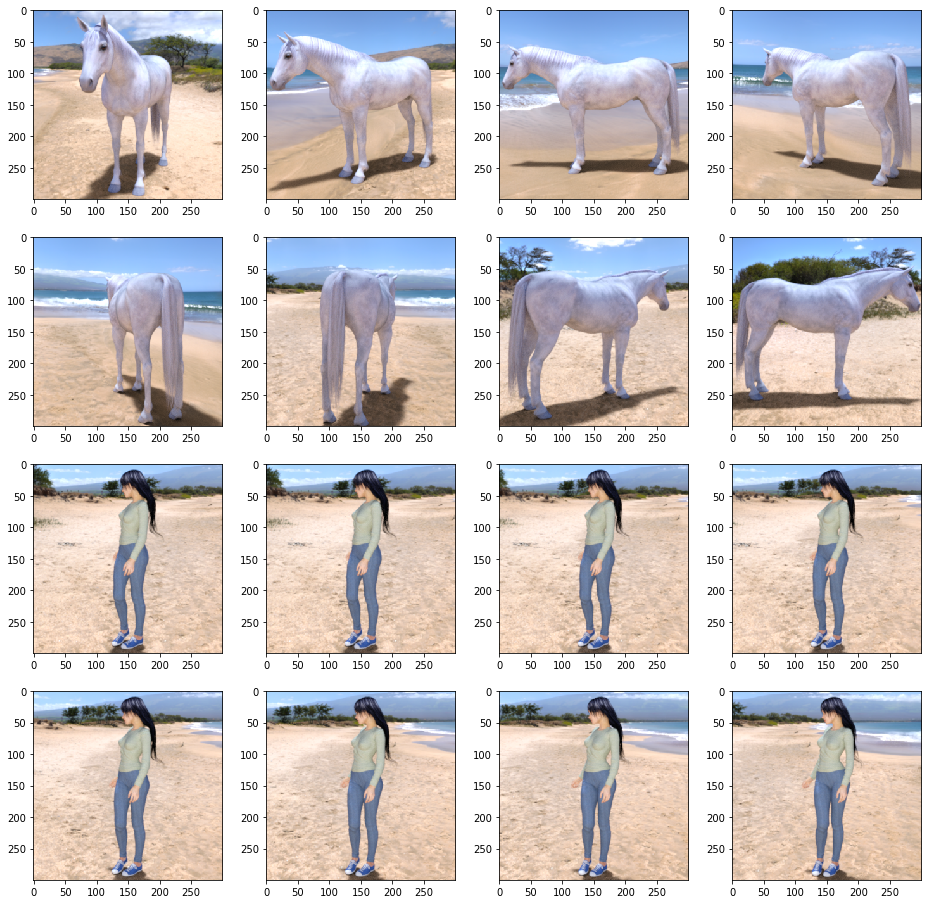

In [6]:
# display 8 horses and 8 humans

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

next_horse_img = [os.path.join(train_horse_dir,fname) for fname in train_horse_names[img_index:img_index+8]]

next_human_img = [os.path.join(train_human_dir,fname) for fname in train_human_names[img_index:img_index+8]]

for i, img_path in enumerate(next_horse_img+next_human_img):
    sp = plt.subplot(nrows, ncols, i+1)
    
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()
                  

## Building model

In [7]:
import tensorflow as tf

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])

## Data Preprocessing

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory('./hhdata/horse-or-human', 
                                                   target_size=(300,300),
                                                   batch_size=128,
                                                   class_mode='binary')

validation_generator = validation_datagen.flow_from_directory('./hhdata/validation-horse-or-human', 
                                                   target_size=(300,300),
                                                   batch_size=32,
                                                   class_mode='binary')


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## Model Training

In [11]:
history = model.fit(train_generator, steps_per_epoch=8, epochs=15, verbose=1, validation_data=validation_generator,
                   validation_steps=8)

Epoch 1/15
8/8 [==============================] - 39s 5s/step - loss: 3.0113 - accuracy: 0.5417 - val_loss: 1.0707 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 44s 5s/step - loss: 0.6475 - accuracy: 0.6172 - val_loss: 1.9570 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 36s 4s/step - loss: 0.6803 - accuracy: 0.7197 - val_loss: 0.5351 - val_accuracy: 0.8047
Epoch 4/15
8/8 [==============================] - 32s 4s/step - loss: 0.7413 - accuracy: 0.6986 - val_loss: 0.4929 - val_accuracy: 0.8242
Epoch 5/15
8/8 [==============================] - 32s 4s/step - loss: 0.3396 - accuracy: 0.8320 - val_loss: 0.4416 - val_accuracy: 0.8633
Epoch 6/15
8/8 [==============================] - 35s 4s/step - loss: 0.2475 - accuracy: 0.9121 - val_loss: 0.5077 - val_accuracy: 0.8750
Epoch 7/15
8/8 [==============================] - 33s 4s/step - loss: 0.4471 - accuracy: 0.8265 - val_loss: 0.5325 - val_accuracy: 0.8711
Epoch 8/15
8/8 [==================

In [13]:
model.save_weights('hhmodel1.h5')

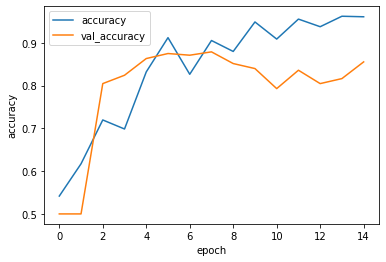

In [14]:
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    path='./hhdata/test/' + fn
    img = image.load_img(path, target_size=(300,300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images=np.vstack([x])
    classes = model.predict(images,batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(fn + " is a human")
    else:
        print(fn + " is a horse")

## Visualizing Intermediate Representation

/Users/shweta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


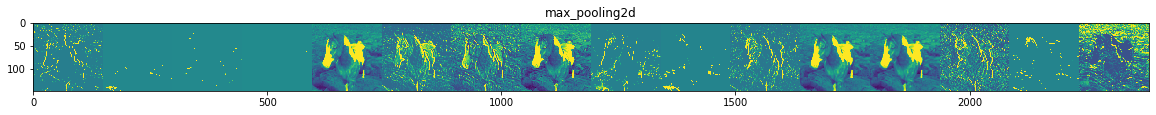

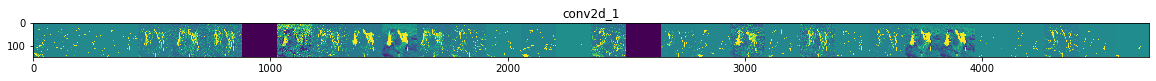

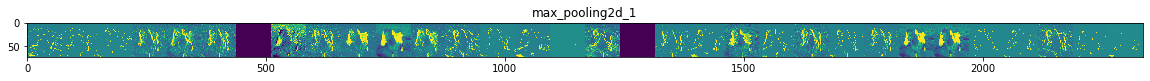

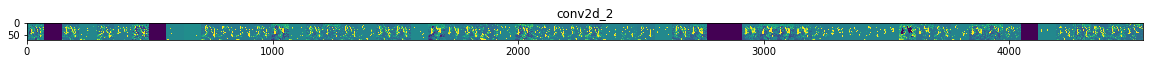

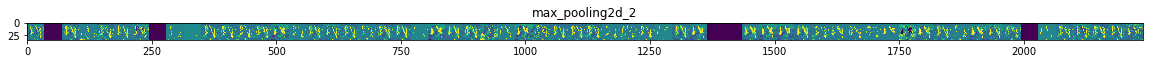

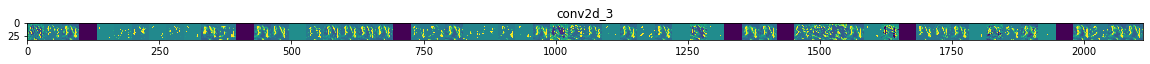

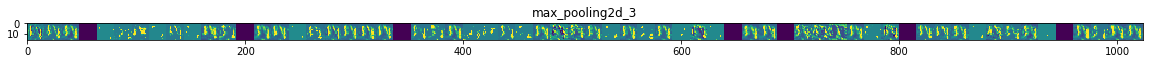

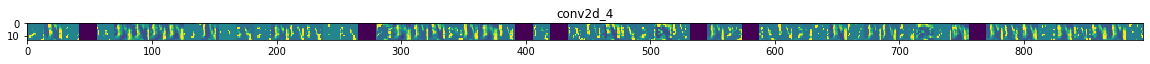

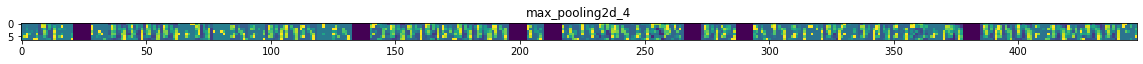

In [16]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# define new model that will take image as an input and will output intermediate 
# representations for all layers in previous model after the first

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)

horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]

img_path = random.choice(horse_img_files+human_img_files)
img = load_img(img_path, target_size=(300,300))
x = img_to_array(img) # Numpy array with shape (150,150,3)
x = x.reshape((1,) + x.shape) # Numpy array with shape (1,150,150,3)

# rescale 1/255
x /= 255

# now run imagethorugh network to get intermediate representation
successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if(len(feature_map.shape)==4):
        # for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        display_grid = np.zeros((size, size*n_features))
        
        for i in range(n_features):
            x = feature_map[0,:,:,i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x,0,255).astype('uint8')
            display_grid[:, i*size : (i+1)*size] = x
            
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')


